In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [3]:
#import data
mist_df=pd.read_csv('mnist.csv')
mist_df


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# split the dataset into features i.e pixels and targets i.e labels 
features=mist_df.drop('label',axis=1)
labels=mist_df['label']

In [5]:
# Normalize pixel values to be in the riange[0,1]
features=features/255.0

In [6]:
#convert features and labels into numpy arrays 
features=np.array(features)
labels=np.array(labels)

In [7]:
#reshape the features to match the expected input shape
features=features.reshape(-1,28,28)

#reshape the labels to one-dim
labels=labels.reshape(-1)


In [8]:
model=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), #Flatten the 28x28 image matrix
  keras.layers.Dense(128,activation="relu"),#fully connected layer of non linearity
  keras.layers.Dropout(0.2), #Dropout layer to prevent overfitting 
  keras.layers.Dense(10,activation='softmax') #output layer with 10 n

])

c:\Program Files\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# #compile the model
# model.compile(optimizer='adam',loss='sparse_categorical_crossentrophy',metrics=['accuracy']) #cross-entrophy l
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(features,labels,epochs=5)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8440 - loss: 0.5369
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9497 - loss: 0.1671
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9638 - loss: 0.1220
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9684 - loss: 0.1013
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9756 - loss: 0.0802


In [11]:
predication=model.predict(features) # use the same dataset for predications


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


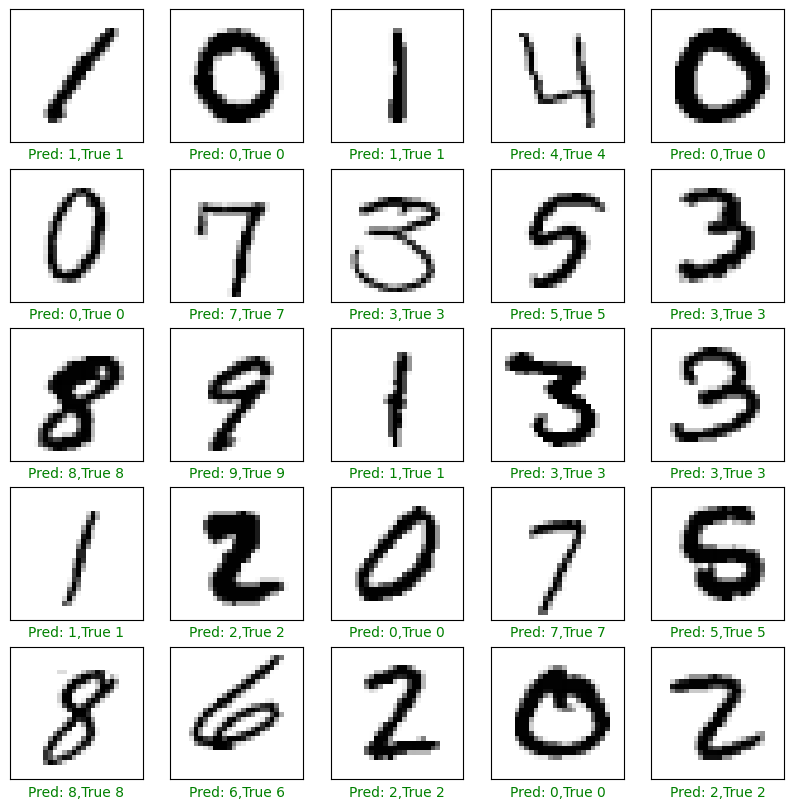

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i],cmap=plt.cm.binary)
    predication_label=np.argmax(predication[i])
    true_label=labels[i]
    if predication_label==true_label:
        color="green"
    else:
        color="red"
    plt.xlabel(f"Pred: {predication_label},True {true_label}",color=color)
plt.show()           
